In [13]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from SuperpixelCutsPy import *
import scipy as sp
import spectral as spec
# Configs for Notebooks
plt.rcParams["figure.figsize"] = [9,7]
np.set_printoptions(suppress=True)

In [2]:
h5_import = h5py.File("data/samson_abc.h5",'r+').get('samson_a')
hyperspectral_cube = np.array(h5_import)
nx,ny,nb = hyperspectral_cube.shape
del h5_import

In [10]:
preprocessing_pipeline = Preprocesser.Preprocesser(data = hyperspectral_cube)
#preprocessing_pipeline.gaussian_blur(blur_param = 0)
preprocessing_pipeline.singular_value_decomposition(n_svd = 5)
preprocessing_pipeline.layer_normalization()
hyperspectral_cube = preprocessing_pipeline.data.copy()
original_hyperspectral_cube = preprocessing_pipeline.original_data.copy()

In [14]:
(class_map, cluster_cent) = spec.clustering.kmeans(hyperspectral_cube, nclusters=3)

spectral:INFO: k-means iteration 1 - 5322 pixels reassigned.
spectral:INFO: k-means iteration 2 - 1027 pixels reassigned.
spectral:INFO: k-means iteration 3 - 1427 pixels reassigned.
spectral:INFO: k-means iteration 4 - 581 pixels reassigned.


spectral:INFO: k-means iteration 5 - 228 pixels reassigned.
spectral:INFO: k-means iteration 6 - 87 pixels reassigned.
spectral:INFO: k-means iteration 7 - 31 pixels reassigned.
spectral:INFO: k-means iteration 8 - 11 pixels reassigned.
spectral:INFO: k-means iteration 9 - 3 pixels reassigned.
spectral:INFO: k-means iteration 10 - 0 pixels reassigned.
spectral:INFO: kmeans terminated with 3 clusters after 9 iterations.


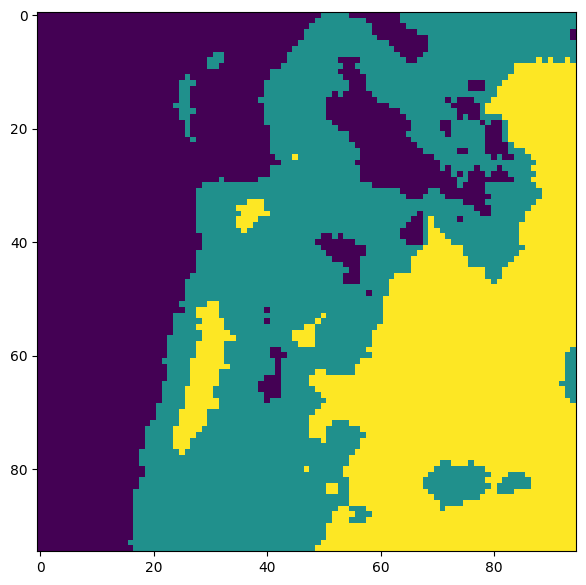

In [15]:
plt.imshow(class_map);

In [16]:
dataset_name = 'fields_data_2022'
h5_import = h5py.File("data/bhsi_2023.h5",'r+').get('Cube/resultarray/inputdata')
hyperspectral_cube = np.array(h5_import)
hyperspectral_cube = np.moveaxis(np.array(hyperspectral_cube), [0], [2])
hyperspectral_cube = np.moveaxis(np.array(hyperspectral_cube), [0], [1])
hyperspectral_cube = hyperspectral_cube[5:205, 5:205, :].copy()
nx,ny,nb = hyperspectral_cube.shape
del h5_import

In [23]:
(class_map, cluster_cent) = spec.clustering.kmeans(hyperspectral_cube, nclusters=5, max_iterations=30)

spectral:INFO: k-means iteration 1 - 28063 pixels reassigned.
spectral:INFO: k-means iteration 2 - 3730 pixels reassigned.
spectral:INFO: k-means iteration 3 - 1836 pixels reassigned.
spectral:INFO: k-means iteration 4 - 1365 pixels reassigned.
spectral:INFO: k-means iteration 5 - 1370 pixels reassigned.
spectral:INFO: k-means iteration 6 - 1380 pixels reassigned.
spectral:INFO: k-means iteration 7 - 1358 pixels reassigned.
spectral:INFO: k-means iteration 8 - 1264 pixels reassigned.
spectral:INFO: k-means iteration 9 - 1187 pixels reassigned.
spectral:INFO: k-means iteration 10 - 1075 pixels reassigned.
spectral:INFO: k-means iteration 11 - 958 pixels reassigned.
spectral:INFO: k-means iteration 12 - 839 pixels reassigned.
spectral:INFO: k-means iteration 13 - 774 pixels reassigned.
spectral:INFO: k-means iteration 14 - 686 pixels reassigned.
spectral:INFO: k-means iteration 15 - 557 pixels reassigned.
spectral:INFO: k-means iteration 16 - 483 pixels reassigned.
spectral:INFO: k-means

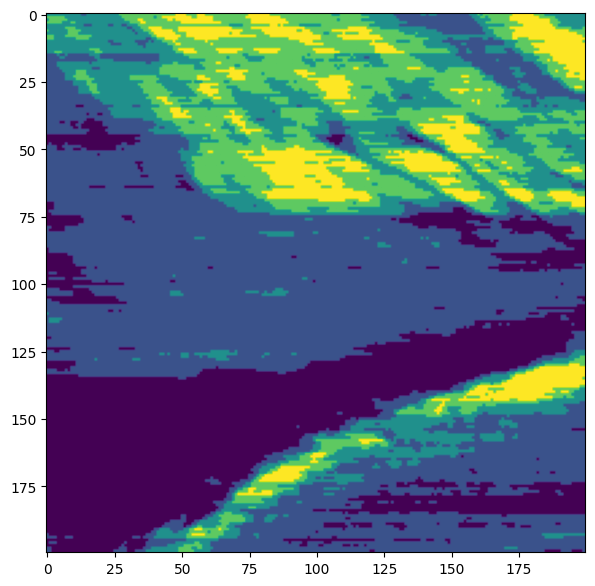

In [24]:
plt.imshow(class_map);